# Yapay Zeka Uygulamaları Dersi Vize Ödevi - İbrahim Hakkı HARMANKAYA

## Projenin amacı verilen veri setini işleyerek bir yapay zeka modeli eğitmek.

### Ad Soyad: İbrahim Hakkı HARMANKAYA

### Okul Numarası: 213302022

##### Gerekli kütüphanelerin ekledim.

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

##### Veri setinin ekledim.

In [6]:
df=pd.read_csv("laptop_data.csv")

##### Veri setini önizleme yaptım.

In [9]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


##### Veri seti hakkında bilgi aldım.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


##### Veri setindeki sütunlardaki değerlerin toplamı yazdım.

In [15]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

##### Boş değerler hesapladım.

In [18]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Veri Görselleştirme

##### Çukuk grafiği oluşturdum.

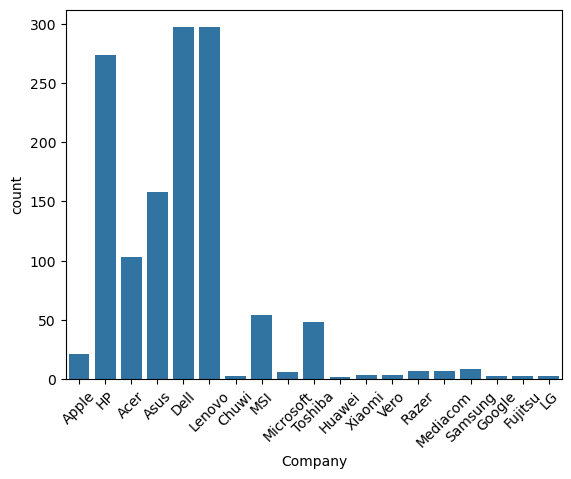

In [25]:
sns.countplot(x=df["Company"])
plt.xticks(rotation=45);

##### Başka bir çubuk grafiği daha oluşturdum.

C:\Users\hakki\AppData\Local\Temp\ipykernel_14792\1024662876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Company"], palette=renk)


<Axes: xlabel='count', ylabel='Company'>

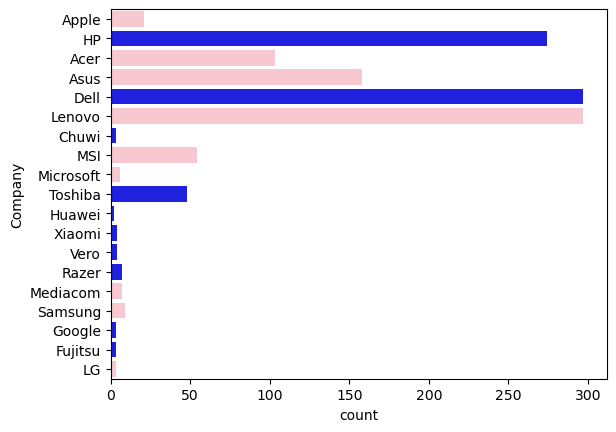

In [27]:
renk={"Mediacom":"pink", "Xiaomi":"blue","MSI":"pink", "Google":"blue","Apple":"pink", "Dell":"blue","Asus":"pink", "Toshiba":"blue","Microsoft":"pink", "Fujitsu":"blue","Acer":"pink", "Chuwi":"blue","Lenovo":"pink", "Razer":"blue","LG":"pink", "Huawei":"blue", "HP":"blue","Samsung":"pink", "Vero":"blue"}
sns.countplot(df["Company"], palette=renk)

##### Başka bir grafik daha oluşturdum.

<Axes: >

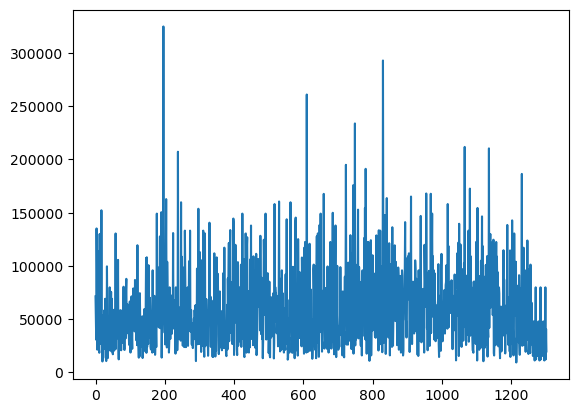

In [31]:
df["Price"].plot()

#### Keşfedici veri analizi işlemleri ve Veri Önişleme

In [34]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

##### TypeName sütununa One Hot Encoding işlemi uygulandım.

In [37]:
df=pd.get_dummies(df, columns=['TypeName'])

In [39]:
df.head()

,Unnamed: 0,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,0,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,False,False,False,True,False
1,1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,False,True,False
2,2,HP,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,True,False,False
3,3,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,False,False,False,True,False
4,4,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,False,False,False,True,False


In [41]:
df['Cpu'].nunique()

118

##### İşlemci model numaraları ve GHz hızları düzenledim.

In [44]:
def extract_cpu_manufacturer(cpu):
    return cpu.split()[0]

def extract_cpu_series(cpu):
    return " ".join(cpu.split()[:2])

def extract_cpu_model(cpu):
    match = re.search(r'\d+[A-Za-z]*', cpu)
    return match.group() if match else None

def extract_clock_speed(cpu):
    match = re.search(r'[\d\.]+GHz', cpu)
    return float(match.group()[:-3]) if match else None

In [46]:
df['CPU Manufacturer'] = df['Cpu'].apply(extract_cpu_manufacturer)
df['CPU Series'] = df['Cpu'].apply(extract_cpu_series)
df['CPU Model'] = df['Cpu'].apply(extract_cpu_model)
df['Clock Speed (GHz)'] = df['Cpu'].apply(extract_clock_speed)

In [48]:
df.tail()

,Unnamed: 0,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU Manufacturer,CPU Series,CPU Model,Clock Speed (GHz)
1298,1298,Lenovo,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,True,False,False,False,False,False,Intel,Intel Core,7,2.5
1299,1299,Lenovo,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,True,False,False,False,False,False,Intel,Intel Core,7,2.5
1300,1300,Lenovo,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,False,False,False,True,False,False,Intel,Intel Celeron,3050,1.6
1301,1301,HP,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,False,False,False,True,False,False,Intel,Intel Core,7,2.5
1302,1302,Asus,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,...,False,False,False,True,False,False,Intel,Intel Celeron,3050,1.6


In [50]:
df.head()

,Unnamed: 0,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU Manufacturer,CPU Series,CPU Model,Clock Speed (GHz)
0,0,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,False,False,False,False,True,False,Intel,Intel Core,5,2.3
1,1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,False,False,False,False,True,False,Intel,Intel Core,5,1.8
2,2,HP,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,False,False,False,True,False,False,Intel,Intel Core,5,2.5
3,3,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,False,False,False,False,True,False,Intel,Intel Core,7,2.7
4,4,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,False,False,False,False,True,False,Intel,Intel Core,5,3.1


##### Ram kolunundaki tüm GB yazılarını sildim.

In [53]:
df=df.drop('Unnamed: 0', axis=1)

In [55]:
df['Ram']= df['Ram'].str.replace('GB', '').astype(int)

In [57]:
df['Memory'].nunique()

39

In [59]:
df.head()

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU Manufacturer,CPU Series,CPU Model,Clock Speed (GHz)
0,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,False,False,False,True,False,Intel,Intel Core,5,2.3
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,False,True,False,Intel,Intel Core,5,1.8
2,HP,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,True,False,False,Intel,Intel Core,5,2.5
3,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,False,False,False,True,False,Intel,Intel Core,7,2.7
4,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,False,False,False,True,False,Intel,Intel Core,5,3.1


##### Tablodaki işletim sistemleri düzenledim.

In [62]:
df=pd.get_dummies(df, columns=['OpSys'])

##### Tablodaki ağırlık sütunundaki verileri düzelttim.

In [65]:
df['Weight']= df['Weight'].str.replace('kg', '').astype(float)

##### Depolama kısmı daha kolay anlaşılması için (Capacity MemoryType) olarak ayırdım ve tüm (TB,GB vb) yazıları kaldırdım.

In [68]:
df['Capacity'] = df['Memory'].str.extract(r'(\d+(?:\.\d+)?\s?\w+)')
df['MemoryType'] = df['Memory'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)', expand=False)

In [70]:
def convert_to_gb(value):
    if 'TB' in value:
        return float(value.replace('TB', '').strip()) * 1024  
    elif 'GB' in value:
        return float(value.replace('GB', '').strip())
    else:
        return None  

df['Capacity'] = df['Capacity'].apply(convert_to_gb)

##### GPU Kısmındaki marka model bilgisini ayırıyorum ki molel daha kolay anlasın.

In [73]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

# Harici veya entegre GPU ayrımı
def gpu_type(gpu):
    if 'Intel' in gpu:
        return 'Integrated'
    else:
        return 'Discrete'

df['Gpu_Type'] = df['Gpu'].apply(gpu_type)

##### Kontrol yaptım.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company                      1303 non-null   object 
 1   Inches                       1303 non-null   float64
 2   ScreenResolution             1303 non-null   object 
 3   Cpu                          1303 non-null   object 
 4   Ram                          1303 non-null   int32  
 5   Memory                       1303 non-null   object 
 6   Gpu                          1303 non-null   object 
 7   Weight                       1303 non-null   float64
 8   Price                        1303 non-null   float64
 9   TypeName_2 in 1 Convertible  1303 non-null   bool   
 10  TypeName_Gaming              1303 non-null   bool   
 11  TypeName_Netbook             1303 non-null   bool   
 12  TypeName_Notebook            1303 non-null   bool   
 13  TypeName_Ultrabook

In [78]:
df.head()

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,TypeName_2 in 1 Convertible,...,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Capacity,MemoryType,Gpu_Brand,Gpu_Type
0,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,False,...,False,False,False,False,False,True,128.0,SSD,Intel,Integrated
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,False,...,False,False,False,False,False,True,128.0,Flash Storage,Intel,Integrated
2,HP,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,False,...,False,True,False,False,False,False,256.0,SSD,Intel,Integrated
3,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,False,...,False,False,False,False,False,True,512.0,SSD,AMD,Discrete
4,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,False,...,False,False,False,False,False,True,256.0,SSD,Intel,Integrated


### Özellik Mühendisliği

##### İşlemci marka, model ve seri olamak üzere 3'e ayırdım.

In [82]:
df[['CPU Manufacturer', 'CPU Series', 'CPU Model']]

,CPU Manufacturer,CPU Series,CPU Model
0,Intel,Intel Core,5
1,Intel,Intel Core,5
2,Intel,Intel Core,5
3,Intel,Intel Core,7
4,Intel,Intel Core,5
...,...,...,...
1298,Intel,Intel Core,7
1299,Intel,Intel Core,7
1300,Intel,Intel Celeron,3050
1301,Intel,Intel Core,7


In [84]:
df['CPU Manufacturer'].value_counts()

CPU Manufacturer
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [86]:
df=pd.get_dummies(df, columns=['CPU Manufacturer'])

In [88]:
df['CPU Series'].value_counts()

CPU Series
Intel Core        1105
Intel Celeron       88
Intel Pentium       30
AMD A9-Series       17
Intel Atom          13
AMD A6-Series       11
AMD E-Series         9
AMD A12-Series       8
AMD A10-Series       6
AMD Ryzen            4
Intel Xeon           4
AMD A8-Series        4
AMD FX               2
AMD A4-Series        1
Samsung Cortex       1
Name: count, dtype: int64

In [90]:
cpu_counts = df['CPU Series'].value_counts()
df['CPU_Series_Frequency'] = df['CPU Series'].map(cpu_counts)

In [92]:
cpu_model_counts = df['CPU Model'].value_counts()
def categorize_popularity(count):
    if count > 100:
        return "High"
    elif count > 10:
        return "Medium"
    else:
        return "Low"

df['CPU_Model_Popularity'] = df['CPU Model'].map(cpu_model_counts).apply(categorize_popularity)
#Değerler ayarlandım.

In [94]:
df=pd.get_dummies(df, columns=['CPU_Model_Popularity'])

In [96]:
df.head()

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,TypeName_2 in 1 Convertible,...,MemoryType,Gpu_Brand,Gpu_Type,CPU Manufacturer_AMD,CPU Manufacturer_Intel,CPU Manufacturer_Samsung,CPU_Series_Frequency,CPU_Model_Popularity_High,CPU_Model_Popularity_Low,CPU_Model_Popularity_Medium
0,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,False,...,SSD,Intel,Integrated,False,True,False,1105,True,False,False
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,False,...,Flash Storage,Intel,Integrated,False,True,False,1105,True,False,False
2,HP,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,False,...,SSD,Intel,Integrated,False,True,False,1105,True,False,False
3,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,False,...,SSD,AMD,Discrete,False,True,False,1105,True,False,False
4,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,False,...,SSD,Intel,Integrated,False,True,False,1105,True,False,False


##### Depolama alanı ayarladım.

In [99]:
df['MemoryType'].value_counts()

MemoryType
SSD              843
HDD              375
Flash Storage     75
Hybrid            10
Name: count, dtype: int64

In [101]:
df=pd.get_dummies(df, columns=['MemoryType'])

##### Ekran kartı sütununu ayarladım.

In [104]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [106]:
df=pd.get_dummies(df, columns=['Gpu_Brand'])

#### Model Test

##### Test için gerekli tanımlamalar ve kodları yazdım.

In [110]:
x=df[["Inches", "Ram", "TypeName_2 in 1 Convertible", "TypeName_Gaming", "TypeName_Netbook", "TypeName_Notebook", "TypeName_Ultrabook", "TypeName_Workstation", "Clock Speed (GHz)","Capacity", "OpSys_Android", "OpSys_Chrome OS","OpSys_Linux" ,"OpSys_Mac OS X", "OpSys_No OS", "OpSys_Windows 10", "OpSys_Windows 10 S", "OpSys_Windows 7", "OpSys_macOS" , "CPU Manufacturer_AMD", "CPU Manufacturer_Intel", "CPU Manufacturer_Samsung", "CPU_Series_Frequency", "CPU_Model_Popularity_High", "CPU_Model_Popularity_Low", "CPU_Model_Popularity_Medium", "MemoryType_Flash Storage", "MemoryType_HDD", "MemoryType_Hybrid", "MemoryType_SSD", "Gpu_Brand_AMD", "Gpu_Brand_ARM", "Gpu_Brand_Intel", "Gpu_Brand_Nvidia"]]
y=df[["Price"]]

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [114]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1042, 34), (261, 34), (1042, 1), (261, 1))

In [118]:
from sklearn.metrics import r2_score, mean_squared_error

##### 1.Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
rf = RandomForestRegressor()
model = rf.fit(x_train, y_train)
tahmin = model.predict(x_test)

C:\Users\hakki\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [124]:
r2_score(y_test, tahmin)

0.8126611687961725

In [125]:
mean_squared_error(y_test, tahmin) ** .5

16435.33519490141

##### 2.Gradient Boosting	

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
gf = GradientBoostingRegressor()
model = gf.fit(x_train, y_train)
tahmin = model.predict(x_test)

C:\Users\hakki\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [133]:
r2_score(y_test, tahmin)

0.8084083654719797

In [136]:
mean_squared_error(y_test, tahmin) ** .5

16620.8386658146

##### 3.Decision Tree

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
df = DecisionTreeRegressor()
model = df.fit(x_train, y_train)
tahmin = model.predict(x_test)

In [143]:
r2_score(y_test, tahmin)

0.7385712255362455

In [145]:
mean_squared_error(y_test, tahmin) ** .5

19415.177088736826

##### 4.Extra Trees

In [148]:
from sklearn.ensemble import ExtraTreesRegressor

In [150]:
ef = DecisionTreeRegressor()
model = ef.fit(x_train, y_train)
tahmin = model.predict(x_test)

In [152]:
r2_score(y_test, tahmin)

0.7382647227994674

In [154]:
mean_squared_error(y_test, tahmin) ** .5

19426.555066820925

##### 5.Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

In [159]:
lr = LinearRegression()

In [161]:
lr.fit(x_train, y_train)

LinearRegression()

In [163]:
tahmin = lr.predict(x_test)

In [165]:
r2_score(y_test, tahmin)

0.6877431751085332

In [167]:
mean_squared_error(y_test, tahmin) ** 0.5

21218.790864381193

# Sonuç Olarak

### 5 Adet model testi yaptım bunlardan 2 tanesi 80 üzeri, 2 tanesi 70 üzeri ve sonuncusu ise 60 üzeri sonuç verdi.

In [172]:
sns.heatmap(df.corr(), annot=True)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'corr'

In [174]:
sns.heatmap(df.corr(), annot=True)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'corr'

In [176]:
df.corr()

AttributeError: 'DecisionTreeRegressor' object has no attribute 'corr'